<a href="https://colab.research.google.com/github/michelmb/InvestmentManagement/blob/master/Carteira_Formula_M%C3%A1gica_Joel_Greenblatt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Como montar uma carteira de investimentos utilizando a formula mágica de Joel Greenblatt

### Importar as bibliotecas que serão utilizadas

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime

### Obter dados do site [Fundamentus](https://www.fundamentus.com.br/resultado.php?segmento=)

In [ ]:
# função para converter valores percentuais para valores decimais
def convert_perc(value):
    return pd.to_numeric(value.replace('%','').replace('.', '').replace(',', '.'))

# mapeando colunas que possuem valores percentuais
convs = {5: convert_perc, 12: convert_perc, 13: convert_perc, 15: convert_perc, 16: convert_perc, 20: convert_perc}

# lendo tabela de dados
fundamentus = pd.read_html('https://www.fundamentus.com.br/resultado.php?segmento=',
                           decimal=',', thousands='.', index_col='Papel', converters=convs)[0]

# Inspecionando valores do dataset
fundamentus.head()

,Cotação,P/L,P/VP,PSR,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,EV/EBIT,EV/EBITDA,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Patrim. Líq,Dív.Brut/ Patrim.,Cresc. Rec.5a
Papel,,,,,,,,,,,,,,,,,,,,
VNET3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,12.99,0.0,9.257250e+09,0.00,-2.71
CFLU4,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.88,10.72,1.1,17.68,32.15,0.0,6.035100e+07,0.06,8.14
CLAN3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,-1.05,0.0,1.012240e+09,0.00,-63.96
CLSC6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,22.88,0.0,1.551160e+09,0.00,6.66
CSTB3,150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.85,28.98,2.6,22.40,20.11,0.0,8.420670e+09,0.14,31.91


In [ ]:
# Inspecionando valores do dataset
fundamentus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 887 entries, VNET3 to BRAP4
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cotação            887 non-null    float64
 1   P/L                887 non-null    float64
 2   P/VP               887 non-null    float64
 3   PSR                887 non-null    float64
 4   Div.Yield          887 non-null    float64
 5   P/Ativo            887 non-null    float64
 6   P/Cap.Giro         887 non-null    float64
 7   P/EBIT             887 non-null    float64
 8   P/Ativ Circ.Liq    887 non-null    float64
 9   EV/EBIT            887 non-null    float64
 10  EV/EBITDA          887 non-null    float64
 11  Mrg Ebit           887 non-null    float64
 12  Mrg. Líq.          887 non-null    float64
 13  Liq. Corr.         887 non-null    float64
 14  ROIC               887 non-null    float64
 15  ROE                887 non-null    float64
 16  Liq.2meses         887 no

In [ ]:
fundamentus.describe()

,Cotação,P/L,P/VP,PSR,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,EV/EBIT,EV/EBITDA,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Patrim. Líq,Dív.Brut/ Patrim.,Cresc. Rec.5a
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,8.870000e+02,8.870000e+02,8.870000e+02,887.000000,887.000000
mean,66.267554,-8.833540,1600.415017,12.631807,2.726043,9.627042,-2.643145,-16.920913,-1.718816,-580.149030,83.869696,-107.328151,-718.526505,1.516945,20.598997,2.980048e+03,2.806045e+07,4.907485e+09,48.673123,21.098782
std,504.684593,625.473121,33615.944005,322.526890,42.444865,133.078125,93.094474,335.621395,62.775703,12938.614446,1405.814364,1277.478474,10731.490521,2.266408,294.833581,6.470692e+04,1.225289e+08,1.853814e+10,1007.374315,306.342682
min,0.000000,-14786.900000,-2060.540000,-7656.880000,0.000000,0.000000,-2300.530000,-7214.410000,-1452.250000,-272246.000000,-7466.350000,-20051.700000,-219100.000000,0.000000,-139.550000,-1.337780e+04,0.000000e+00,-1.225680e+10,-56.900000,-97.740000
25%,5.180000,-0.380000,0.010000,0.015500,0.000000,0.073000,0.000000,0.000000,-1.805000,0.000000,0.000000,0.000000,-2.795000,0.340000,0.000000,0.000000e+00,0.000000e+00,6.375950e+07,0.000000,-0.595000
50%,14.540000,4.720000,1.170000,0.685000,0.000000,0.410000,0.680000,3.740000,-0.190000,6.680000,5.300000,6.080000,1.540000,1.200000,4.900000,8.890000e+00,0.000000e+00,8.586920e+08,0.230000,5.480000
75%,33.425000,16.565000,2.310000,2.009500,0.625000,0.918500,5.295000,11.225000,0.000000,14.840000,10.925000,14.990000,9.920000,1.930000,11.175000,1.793000e+01,6.733885e+05,3.105800e+09,1.000000,12.915000
max,10081.900000,2220.880000,723708.000000,2659.020000,1254.590000,3275.470000,457.140000,2948.170000,910.250000,19665.000000,21412.600000,18112.100000,15969.500000,28.580000,6170.970000,1.363200e+06,1.592310e+09,2.318290e+11,21227.000000,6354.070000


### Filtrando empresas: possui EV maior que 50M

In [ ]:
fundamentus = fundamentus[fundamentus['Patrim. Líq'] > 50000000]
fundamentus.describe()

,Cotação,P/L,P/VP,PSR,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,EV/EBIT,EV/EBITDA,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Patrim. Líq,Dív.Brut/ Patrim.,Cresc. Rec.5a
count,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,6.780000e+02,6.780000e+02,678.000000,678.000000
mean,79.332729,13.058201,3.008569,7.910611,3.505354,0.857171,0.786106,-8.610782,0.719027,-7.730339,-6.689292,-1.861844,58.934941,1.730708,8.316254,-2.005900,3.402053e+07,6.647143e+09,1.322743,11.664174
std,574.593391,433.783772,6.789947,350.883992,48.524563,1.352567,58.251647,345.151070,44.384438,349.089461,310.131735,744.094090,1423.100467,2.076325,22.822568,73.440107,1.358924e+08,2.086903e+10,3.984618,58.814377
min,0.000000,-9868.830000,0.000000,-7656.880000,0.000000,0.000000,-593.560000,-7214.410000,-337.190000,-7466.350000,-7466.350000,-2737.880000,-13821.200000,0.000000,-30.210000,-874.440000,0.000000e+00,5.189200e+07,0.000000,-77.350000
25%,7.192500,0.000000,0.780000,0.174500,0.000000,0.161250,0.000000,0.000000,-2.417500,0.000000,0.392500,0.000000,0.000000,0.900000,0.000000,0.050000,0.000000e+00,5.248408e+08,0.040000,0.275000
50%,18.490000,9.230000,1.460000,0.850000,0.000000,0.492500,2.190000,6.220000,-0.460000,8.775000,6.585000,8.735000,4.470000,1.370000,6.230000,8.990000,2.159000e+01,1.487405e+09,0.420000,8.125000
75%,36.965000,20.475000,2.652500,2.090750,1.452500,0.970000,6.787500,13.645000,0.000000,17.430000,11.985000,17.157500,11.512500,2.090000,11.750000,16.867500,2.797775e+06,4.790400e+09,1.210000,13.635000
max,10081.900000,2220.880000,77.260000,2659.020000,1254.590000,14.086000,457.140000,2948.170000,910.250000,2484.320000,1640.310000,18112.100000,15969.500000,28.580000,523.010000,202.510000,1.592310e+09,2.318290e+11,57.640000,1014.420000


### Filtrando empresas: exclui empresas *utility* e financeiras

Este dataset não possui informações dos setores da empresas :(



### Filtros adicionais


In [ ]:
# empresas que possuem alguma liquidez
fundamentus = fundamentus[fundamentus['Liq.2meses'] > 1000000]

# com retornos positivos
fundamentus = fundamentus[fundamentus['ROIC'] > 0]
fundamentus = fundamentus[fundamentus['EV/EBIT'] > 0]

fundamentus.describe()

,Cotação,P/L,P/VP,PSR,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,EV/EBIT,EV/EBITDA,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Patrim. Líq,Dív.Brut/ Patrim.,Cresc. Rec.5a
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,1.590000e+02,1.590000e+02,159.000000,159.000000
mean,24.972013,-47.436918,3.156352,2.929541,2.085723,1.054956,2.510440,41.761761,1.041132,41.366918,13.771132,19.658176,12.927862,2.050943,10.285723,4.893019,1.178176e+08,1.210994e+10,1.561509,9.128679
std,19.268802,791.539411,3.976697,3.705779,2.347198,1.074248,43.815346,237.430989,27.925784,201.300217,15.782498,16.493398,28.108071,1.236850,9.364386,36.872517,2.273631e+08,3.153443e+10,2.952979,13.264960
min,2.730000,-9868.830000,0.270000,0.132000,0.000000,0.105000,-472.820000,1.170000,-71.650000,0.420000,0.410000,0.300000,-54.970000,0.570000,0.210000,-330.120000,1.057760e+06,8.222000e+07,0.000000,-27.720000
25%,11.175000,7.965000,1.175000,0.876500,0.220000,0.438500,2.035000,6.515000,-4.200000,9.385000,5.840000,8.445000,1.930000,1.290000,5.520000,3.020000,1.344340e+07,1.339555e+09,0.315000,1.540000
50%,19.680000,15.600000,1.890000,1.811000,1.480000,0.730000,5.060000,11.470000,-1.700000,13.840000,9.250000,15.470000,8.480000,1.720000,8.710000,10.450000,4.292920e+07,3.275420e+09,0.730000,7.720000
75%,32.525000,28.025000,3.310000,3.119000,3.190000,1.194000,11.005000,18.100000,-0.450000,22.480000,14.120000,25.730000,14.405000,2.350000,11.980000,15.220000,1.316160e+08,8.680915e+09,1.310000,14.455000
max,114.620000,420.260000,38.740000,25.909000,14.450000,6.605000,61.450000,2948.170000,286.830000,2484.320000,101.730000,80.060000,178.720000,9.030000,77.520000,88.920000,1.592310e+09,2.318290e+11,20.220000,71.840000


### Criando os rankings

In [ ]:
fundamentus['roic_rank'] = fundamentus['ROIC'].rank(method='dense', ascending=True)
fundamentus['evebit_rank'] = fundamentus['EV/EBIT'].rank(method='dense', ascending=False)
fundamentus['rank'] = fundamentus['roic_rank'] + fundamentus['evebit_rank']

### Carteira da 'Formula Mágica'


In [ ]:
fundamentus['rank'].nlargest(20).sort_values()

Papel
RAPT4     235.0
CSMG3     235.0
CIEL3     239.0
PETR3     241.0
PETR4     243.0
ENAT3     249.0
TGMA3     250.0
WSON33    251.0
CVCB3     253.0
BEEF3     261.0
LEVE3     265.0
EQTL3     265.0
ALUP11    265.0
SAPR3     272.0
SAPR4     274.0
VALE3     275.0
SAPR11    275.0
SMLS3     288.0
WIZS3     290.0
PSSA3     292.0
Name: rank, dtype: float64

### Como avaliar esta carteira?

- Back test
- Avaliação de portfolio


### Bibliotecas que podem ser uteis

- https://github.com/mementum/backtrader
- https://github.com/quantopian/zipline
- https://github.com/quantopian/pyfolio
- https://github.com/robertmartin8/PyPortfolioOpt

#### Falta de dados para realizar estas analises :(


### Avaliação de Portfolio com froteira eficiente de Markowitz

In [ ]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [ ]:
rank = fundamentus['rank'].nlargest(20).sort_values()
rank = rank.reset_index()
rank['SA'] = '.SA'
df = pdr.DataReader(set(rank.Papel.str.cat(rank['SA']).values), data_source='yahoo', start='2017-01-01', end='2020-06-30')['Adj Close'].dropna()
df.head()

[*********************100%***********************]  20 of 20 completed


,ALUP11.SA,BEEF3.SA,CIEL3.SA,CSMG3.SA,CVCB3.SA,ENAT3.SA,EQTL3.SA,LEVE3.SA,PETR3.SA,PETR4.SA,PSSA3.SA,RAPT4.SA,SAPR11.SA,SAPR3.SA,SAPR4.SA,SMLS3.SA,TGMA3.SA,VALE3.SA,WIZS3.SA,WSON33.SA
Date,,,,,,,,,,,,,,,,,,,,
2017-12-26,17.653847,10.2164,19.614975,36.297695,46.192177,6.452562,12.625571,20.255964,15.818643,14.815705,30.003777,6.715320,55.196495,12.065593,10.549649,49.955273,17.362810,37.309837,8.770071,32.638378
2017-12-27,17.800961,10.5901,19.715609,37.029858,47.202969,6.440743,12.775181,20.332531,15.875477,14.889920,30.221560,6.753260,55.215294,11.875584,10.774111,49.654537,17.362810,37.319202,8.922328,33.054688
2017-12-28,18.095192,10.4721,19.822845,37.374397,47.595509,6.352109,12.755752,20.307011,16.017559,14.936310,30.430965,6.800685,56.276936,11.695073,10.942455,50.723816,17.513102,37.693699,8.922328,33.304470
2017-12-29,18.095192,10.4721,19.822845,37.374397,47.595509,6.352109,12.755752,20.307011,16.017559,14.936310,30.430965,6.800685,56.276936,11.695073,10.942455,50.723816,17.513102,37.693699,8.922328,33.304470
2018-01-02,18.006924,10.7081,20.303246,37.770618,48.949772,6.872096,12.769353,20.366560,16.415394,15.353781,30.489599,7.170597,55.921108,12.680605,10.667653,52.454708,17.681068,39.060638,9.249683,33.304470


In [ ]:
from pypfopt import risk_models, expected_returns, plotting, CLA
from matplotlib.ticker import FuncFormatter
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

mu = expected_returns.mean_historical_return(df)
Sigma = risk_models.sample_cov(df)

# Optimise for maximal Sharpe ratio
ef = EfficientFrontier(mu, Sigma)
raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
ef.portfolio_performance(verbose=True)

Expected annual return: 34.7%
Annual volatility: 28.3%
Sharpe Ratio: 1.16


(0.34732491026932444, 0.2829032124118158, 1.1570208322443682)

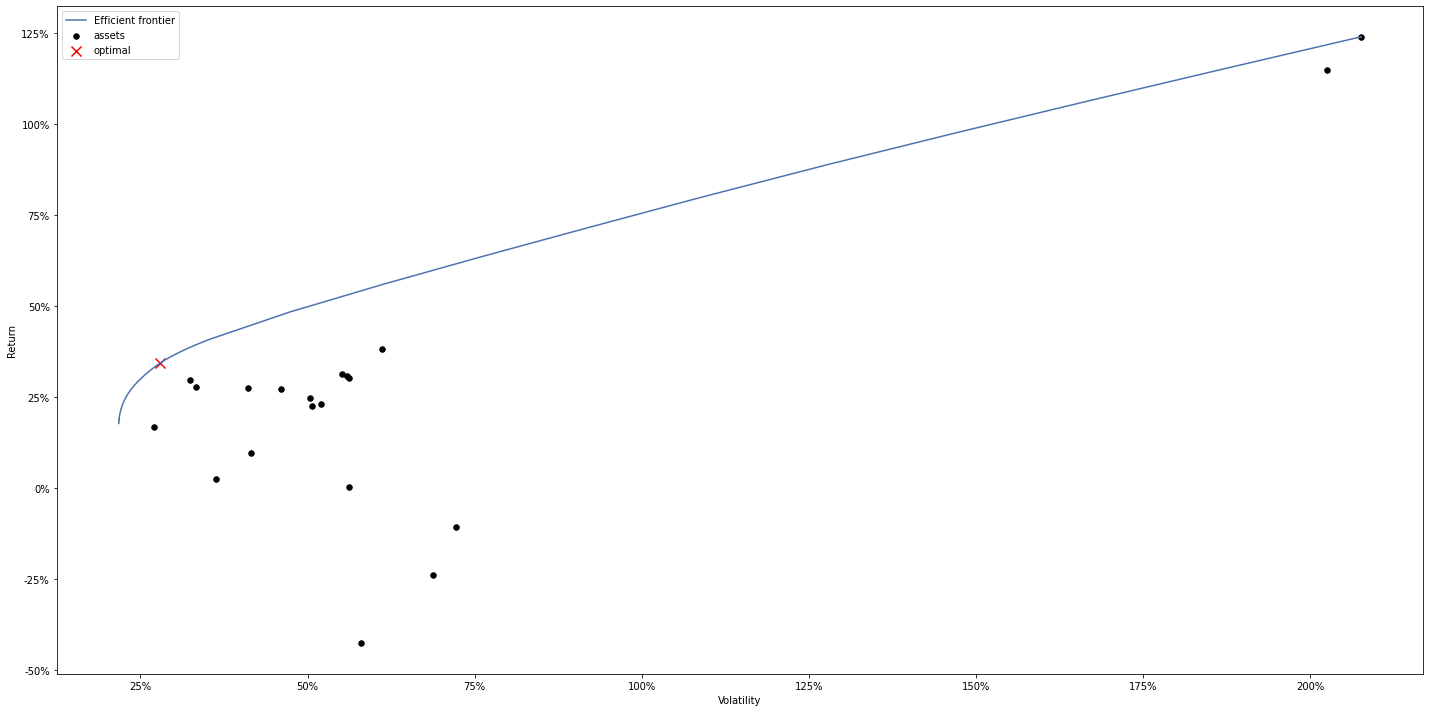

In [ ]:
cla = CLA(mu, Sigma)
ax = plotting.plot_efficient_frontier(cla, showfig = False)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

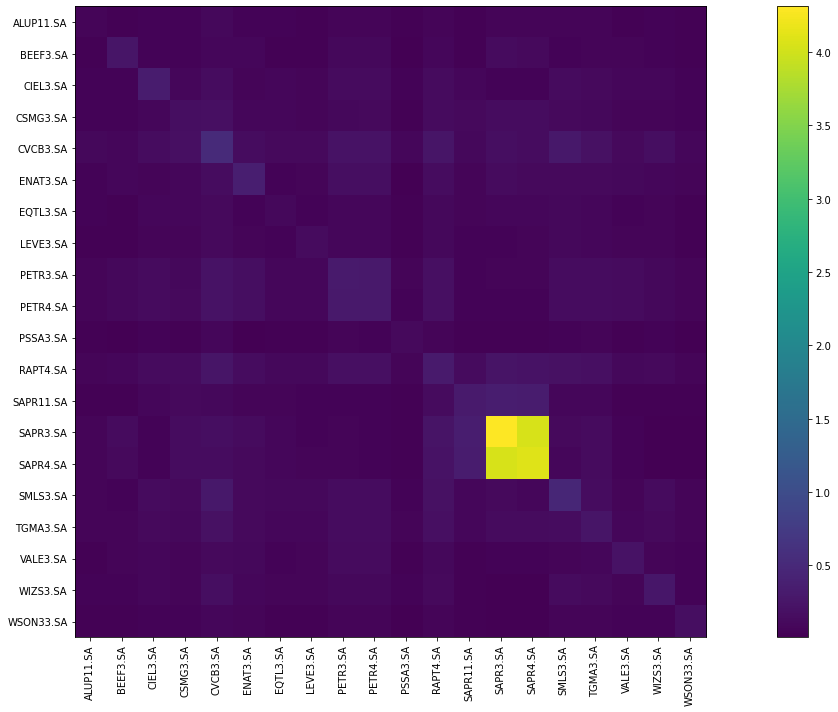

In [ ]:
plotting.plot_covariance(Sigma);